In [ ]:

!dpkg --configure -a
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('StockMarketPrediction-ML.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/StockMarketPrediction-ML.ipynb to pdf
[NbConvertApp] Support files will be in StockMarketPrediction-ML_files/
[NbConvertApp] Making directory ./StockMarketPrediction-ML_files
[NbConvertApp] Making directory ./StockMarketPrediction-ML_files
[NbConvertApp] Writing 49146 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 71993 bytes to /content/drive/My Drive/StockMarketPrediction-ML.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'

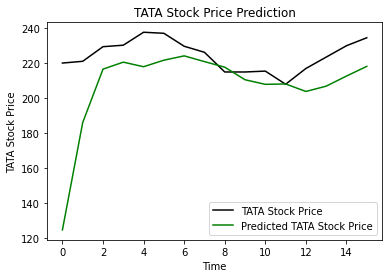

In [ ]:
# Author : Saeid Rezaei , STU:205812010
# Date Dec , 16 2021
# Final Project :CP640 - Machine Learing
# Desciprtion :
# In this project , I will be analysyng the Stock market for few stock such as google, TATA
# I have used Long sorth-term memory (LSTM) model to predict the future loss based on history of price changes
# This is usfull ML method that acts better that Time Series for Stock Market 
# Data has been cleaned prior to this scrip using Perl to fill the missing oinformation
# Logic for missing informations:
# If closing price is missing - fill the value based on previous day price
# If date is missing , record is eliminated
# if price is not in the threshold - (different previous and currect is more than 1000) flag and remove

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Import NSE index for TATA stock for several years
# Like I said above data is cleaned based on Perl scrip (Please see Cleanup.pl under /scr)
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')

# Create traning sets and test based on 1 by 2. means based on volumn of data training is two times more than test
training_set = dataset_train.iloc[:, 1:2].values
# review the data in DataFram
dataset_train.head()

# Use skearn lib to calculate the min and max scale of data and price
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Create 2D matrix , in this case X is an input for next Y tranig sets.
# I have used 60 step that shows better changes , it could be change to other value based on price change and market trend


X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Create Model based on traing data sets 
# Using keras lib
# Create LSTM Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


# Load test data sets for TATA stock 
# again data is cleaned and test data / train ratio is 1:2
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Predict the model based on test data
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)





# plot the prediction

plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [ ]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

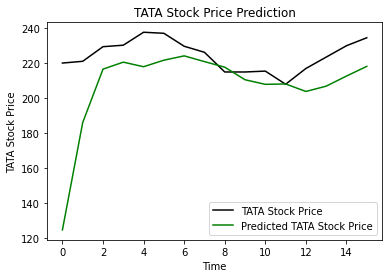

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

In [ ]:


regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 17s 142ms/step - loss: 0.0100
Epoch 2/100
62/62 [==============================] - 9s 144ms/step - loss: 0.0030
Epoch 3/100
62/62 [==============================] - 9s 142ms/step - loss: 0.0027
Epoch 4/100
62/62 [==============================] - 9s 139ms/step - loss: 0.0023
Epoch 5/100
62/62 [==============================] - 9s 139ms/step - loss: 0.0025
Epoch 6/100
62/62 [==============================] - 9s 140ms/step - loss: 0.0021
Epoch 7/100
62/62 [==============================] - 9s 142ms/step - loss: 0.0020
Epoch 8/100
62/62 [==============================] - 9s 140ms/step - loss: 0.0024
Epoch 9/100
62/62 [==============================] - 9s 142ms/step - loss: 0.0018
Epoch 10/100
62/62 [==============================] - 10s 170ms/step - loss: 0.0018
Epoch 11/100
62/62 [==============================] - 9s 142ms/step - loss: 0.0020
Epoch 12/100
62/62 [==============================] - 9s 139ms/step - loss: 0.0018
Epoch 13/10